<a href="https://colab.research.google.com/github/PTC-Education/PTC-API-Playground/blob/main/Transformation_Matrices_Lesson_Plan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a Transformation Matrix

Transformation matrices offer a way to translate and rotate bodies relative to each other. In the examples below we are going to transform a rigid body with reference frame 
$\hat{A} = \begin{bmatrix}
x \\ y \\ z
\end{bmatrix}$
to reference frame
$\hat{B} = \begin{bmatrix}
x' \\ y' \\ z'
\end{bmatrix}$

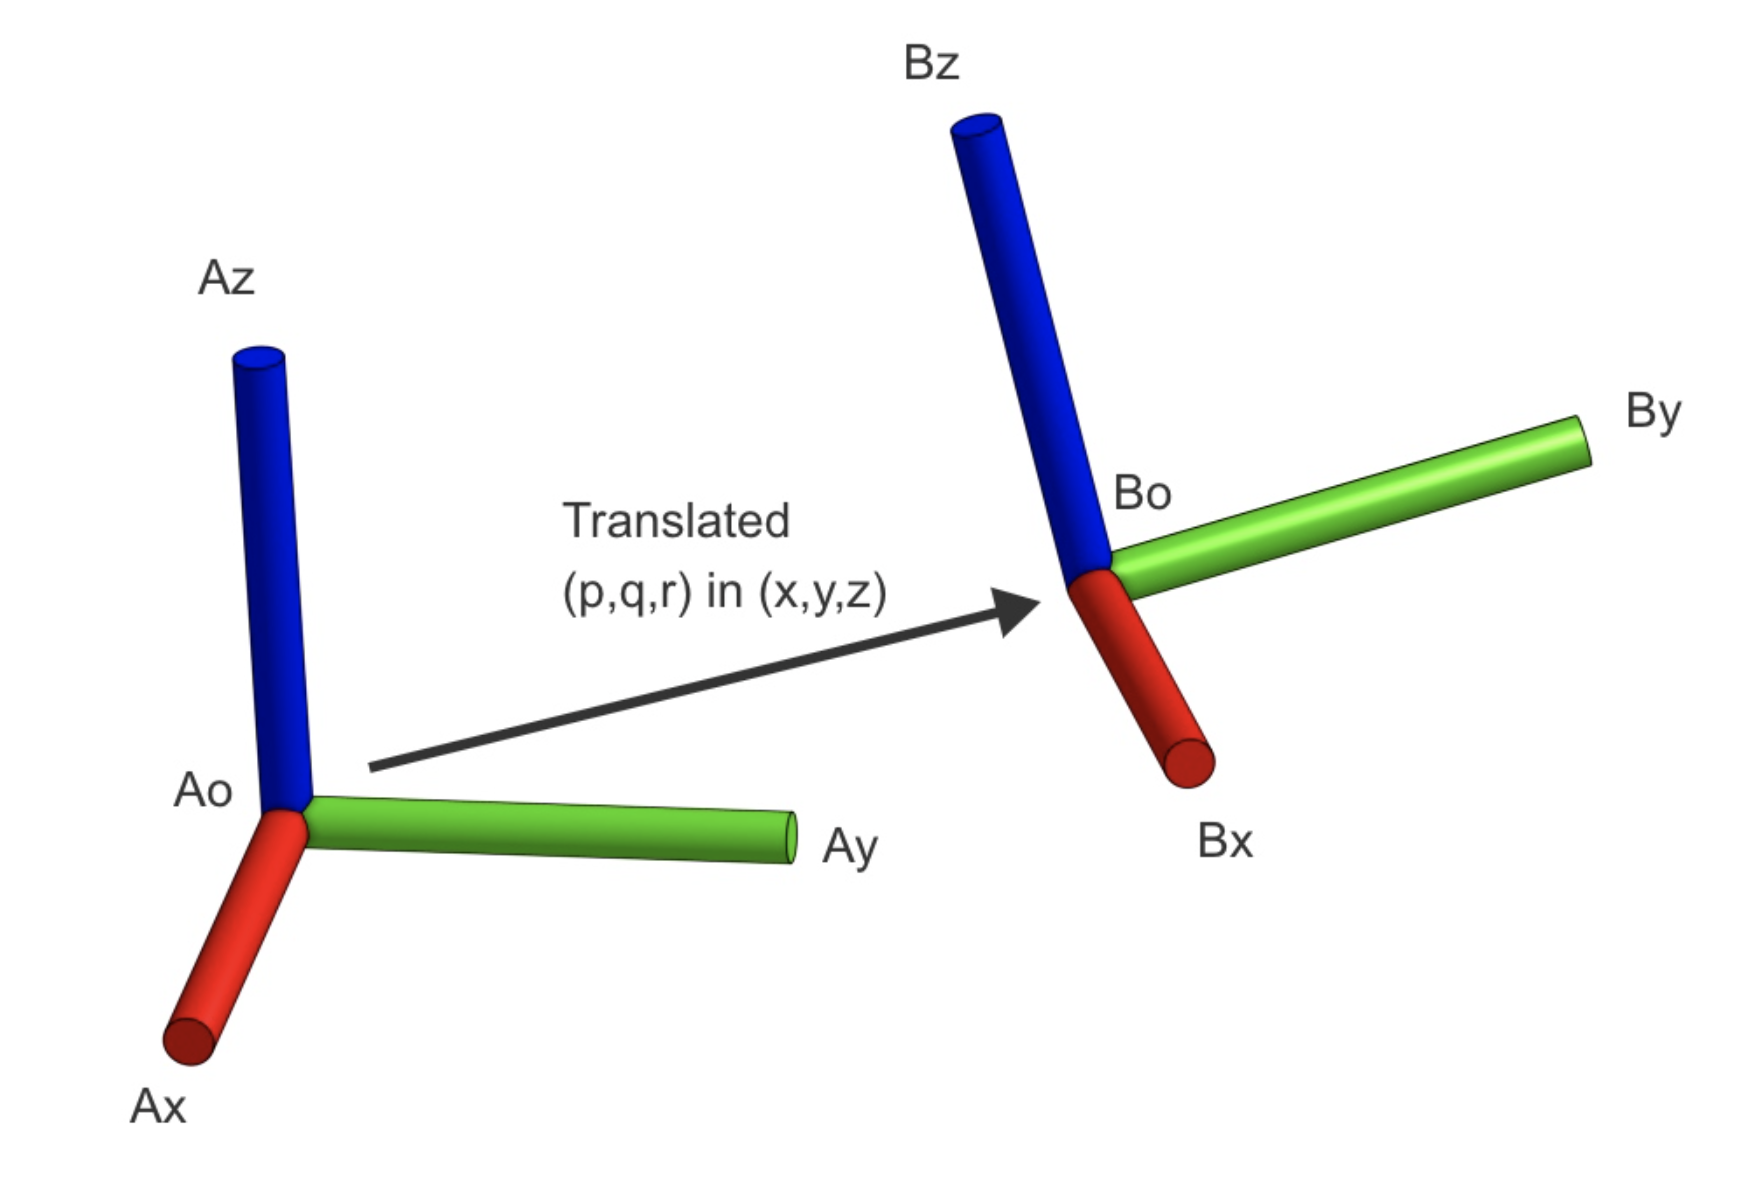


> ### Translation
> This would be an example of a "translation" in space, meaning the orientaiton of the (x,y,z) reference frame stays the same relative to the world, but the origin is moved by (p,q,r) in the (x,y,z) direction, respectively.    
> $\begin{bmatrix}
x' \\ y' \\ z' \\ 1
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 & 0 & p\\
0 & 1 & 0 & q\\
0 & 0 & 1 & r\\
0 & 0 & 0 & 1\\
\end{bmatrix} * 
\begin{bmatrix}
x \\ y \\ z \\ 1
\end{bmatrix}$


# Get connected to Onshape
Make a copy of [this public document](https://cad.onshape.com/documents/bb22099573adad2eb4ea7daa/w/7c08e43470d8f47139b916ab/e/67cb1d22c65fb548487543b6) and update the did, wid, and eid parameters in the snippets below.

In [1]:
#@title Import and Setup Onshape Client

!pip install onshape-client
from onshape_client.client import Client
from onshape_client.onshape_url import OnshapeElement
import json

#@markdown Chage the base if using an enterprise (i.e. "https://ptc.onshape.com")
base = 'https://cad.onshape.com' #@param {type:"string"}

#@markdown Would you like to import your API keys from a file, or copy and paste them directly?
keyImportOption = "Upload Keys from File" #@param ["Upload Keys from File", "Copy/Paste Keys"]

from IPython.display import clear_output 
clear_output()
print("Onshape Client successfully imported!")

if keyImportOption == "Upload Keys from File":
  from google.colab import files
  uploaded = files.upload()
  for fn in uploaded.keys():
    execfile(fn)

  client = Client(configuration={"base_url": base,
                                "access_key": access,
                                "secret_key": secret})
  clear_output()
  print('Onshape client configured - ready to go!')
else:
  access = input("Paste your Onshape Access Key: ")
  secret = input("Paste your Onshape Secret Key: ")
  client = Client(configuration={"base_url": base,
                                "access_key": access,
                                "secret_key": secret})
  clear_output()
  print('Onshape client configured - ready to go!')


Onshape client configured - ready to go!


# Matrix Library

In [7]:
#@title Run this cell to load matrix helper functions

import math
import numpy

def IdentitySixteen():
  m = [
      1, 0, 0, 0,
      0, 1, 0, 0,
      0, 0, 1, 0,
      0, 0, 0, 1
      ]
  return m

def DiceTransform(value):
    switcher = {
        0: [
            0, 0, 1, 0,
            0, 1, 0, 0,
            -1, 0, 0, 0,
            0, 0, 0, 1
           ],
        1: [
            0, 0, 1, 0,
            0, 1, 0, 0,
            -1, 0, 0, 0,
            0, 0, 0, 1
           ],
        2: [
            1, 0, 0, 0,
            0, 0, 1, 0,
            0, -1, 0, 0,
            0, 0, 0, 1
           ],
        3: [
            1, 0, 0, 0,
            0, -1, 0, 0,
            0, 0, -1, 0,
            0, 0, 0, 1
           ],
        4: [
            1, 0, 0, 0,
            0, 1, 0, 0,
            0, 0, 1, 0,
            0, 0, 0, 1
           ],
        5: [
            1, 0, 0, 0,
            0, 0, -1, 0,
            0, 1, 0, 0,
            0, 0, 0, 1
           ],
        6: [
            0, 0, -1, 0,
            0, 1, 0, 0,
            1, 0, 0, 0,
            0, 0, 0, 1
           ] 
    }
  
    # get() method of dictionary data type returns 
    # value of passed argument if it is present 
    # in dictionary otherwise second argument will
    # be assigned as default value of passed argument
    return switcher.get(value, "nothing")

def DiceMove(value,x1,y1):
  matrix = DiceTransform(value)
  matrix[3] = x1
  matrix[7] = y1
  return matrix

def DiceFollow(diceMatrix,tcpMatrix):
  diceMatrix[3] = tcpMatrix[3]
  diceMatrix[7] = tcpMatrix[7]
  diceMatrix[11] = tcpMatrix[11]
  return diceMatrix
  
def sixteenToFourByFour(matrix):
  fourbyfour = [[matrix[0],matrix[1],matrix[2],matrix[3]],
                [matrix[4],matrix[5],matrix[6],matrix[7]],
                [matrix[8],matrix[9],matrix[10],matrix[11]],
                [matrix[12],matrix[13],matrix[14],matrix[15]]]
  return fourbyfour

def fourByFourToSixteen(matrix):
  sixteen = [matrix[0][0],matrix[0][1],matrix[0][2],matrix[0][3],
             matrix[1][0],matrix[1][1],matrix[1][2],matrix[1][3],
             matrix[2][0],matrix[2][1],matrix[2][2],matrix[2][3],
             matrix[3][0],matrix[3][1],matrix[3][2],matrix[3][3]]
  return sixteen

def clockwiseSpinX(theta):
  m = [[1, 0, 0, 0],
       [0, math.cos(theta), math.sin(theta), 0],
       [0, -math.sin(theta), math.cos(theta), 0],
       [0, 0, 0, 1]
       ]
  return m

def clockwiseSpinY(theta):
  m = [[math.cos(theta), 0, math.sin(theta), 0],
       [0, 1, 0, 0],
       [-math.sin(theta), 0, math.cos(theta), 0],
       [0, 0, 0, 1]
       ]
  return m

def clockwiseSpinZ(theta):
  m = [[math.cos(theta), math.sin(theta), 0, 0],
       [-math.sin(theta), math.cos(theta), 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]]
  return m


# Apply to Onshape

## Get Part ID's from Assembly

In [5]:
#@title Get Assembly Definition
#@markdown Function `getAssemblyDefinition(url: str)` returns JSON of all parts in a document. The URL can be any element from the document.
url = 'https://cad.onshape.com/documents/bb22099573adad2eb4ea7daa/w/7c08e43470d8f47139b916ab/e/67cb1d22c65fb548487543b6' #@param {type:"string"}
showResponse = False#@param {type:"boolean"}
listParts = True#@param {type:"boolean"}
def getAssemblyDefinition(url: str):
  fixed_url = '/api/assemblies/d/did/w/wid/e/eid'

  element = OnshapeElement(url)
  fixed_url = fixed_url.replace('did', element.did)
  fixed_url = fixed_url.replace('wid', element.wvmid)
  fixed_url = fixed_url.replace('eid', element.eid)

  method = 'GET'

  params = {}
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
            'Content-Type': 'application/json'}

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  parsed = json.loads(response.data)
  return parsed

assemblyDefinitionResponse = getAssemblyDefinition(url)

if showResponse:
  print(json.dumps(assemblyDefinitionResponse, indent=4, sort_keys=True))
if listParts:
  for instance in assemblyDefinitionResponse['rootAssembly']['instances']:
    name = instance['name']
    id = instance['id']
    print(f'Part named {name} has id {id}')
else:
  pass

Part named XYZ <1> has id MtT3Modpf8/6l7rch
Part named XYZ <2> has id Mqmjho+TUKGFqtaQi


## Create Translation Matrix

In [13]:
#@title Translation Matrix
#@markdown Translate part with specified id.
url = 'https://cad.onshape.com/documents/bb22099573adad2eb4ea7daa/w/7c08e43470d8f47139b916ab/e/67cb1d22c65fb548487543b6' #@param {type:"string"}
partIdToMove = 'Mqmjho+TUKGFqtaQi'#@param {type:'string'}

#@markdown If "isRleative" is True, a global transform will send the part to (x1, y1, z1) location. If "isRelative" is false, the part will move by (x1, y1, z1) from its current location.
isRelative = True#@param {type:'boolean'}

# Translate object by x1,y1,z1 in the x,y,z directions
x1 = 0.05#@param
y1 = 0.05#@param
z1 = 0#@param

occurrences = getAssemblyDefinition(url)['rootAssembly']['occurrences']

for x in occurrences:
    if x['path'][0] == partIdToMove:
      occurrence = x

occurrence['transform'] = IdentitySixteen()
occurrence['transform'][3] = x1
occurrence['transform'][7] = y1
occurrence['transform'][11] = z1

print("Transformation matrix:")
for x in sixteenToFourByFour(occurrence['transform']):
  print(x)

## Send assembly occurence transforms
fixed_url = '/api/assemblies/d/did/w/wid/e/eid/occurrencetransforms'

element = OnshapeElement(url)
fixed_url = fixed_url.replace('did', element.did)
fixed_url = fixed_url.replace('wid', element.wvmid)
fixed_url = fixed_url.replace('eid', element.eid)

method = 'POST'

params = {}
payload = {'isRelative':isRelative,
           'occurrences':[occurrence],
           'transform':occurrence['transform']
    }

headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)


Transformation matrix:
[1, 0, 0, 0.05]
[0, 1, 0, 0.05]
[0, 0, 1, 0]
[0, 0, 0, 1]


## Rotations

There are a number of ways you can represent rotations in a transfomration matrix.
>The values in a rotation matrix are equal to the cosine of the angle between each of the unit vectors for reference frame $\hat{A}$ and reference frame $\hat{B}$, which is the same as calculating the dot product between each of the unit vectors. A simple rotation in three dimensions looks as follows:
>
> $\begin{bmatrix}
x' \\ y' \\ z' \\ 1
\end{bmatrix} = 
\begin{bmatrix}
\hat{A_x}\cdot\hat{B_x} & \hat{A_x}\cdot\hat{B_y} & \hat{A_x}\cdot\hat{B_z} & 0\\
\hat{A_y}\cdot\hat{B_x} & \hat{A_y}\cdot\hat{B_y} & \hat{A_y}\cdot\hat{B_z} & 0\\
\hat{A_z}\cdot\hat{B_x} & \hat{A_z}\cdot\hat{B_y} & \hat{A_z}\cdot\hat{B_z} & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix} * 
\begin{bmatrix}
x \\ y \\ z \\ 1
\end{bmatrix}$
>
You can also break down the rotations into rotations about each of the cardinal axes as follows:
>
>For a clockwise rotation of angle $\theta$ around the Z axis:
>$\begin{bmatrix}
x' \\ y' \\ z' \\ 1
\end{bmatrix} = 
\begin{bmatrix}
\cos(\theta) & \sin(\theta) & 0 & 0\\
-sin(\theta) & \cos(\theta) & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix} * 
\begin{bmatrix}
x \\ y \\ z \\ 1
\end{bmatrix}$
>
>For a clockwise rotation of angle $\theta$ around the Y axis:
>$\begin{bmatrix}
x' \\ y' \\ z' \\ 1
\end{bmatrix} = 
\begin{bmatrix}
\cos(\theta) & 0 & \sin(\theta) & 0\\
0 & 1 & 0 & 0\\
-sin(\theta) & 0 & \cos(\theta) & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix} * 
\begin{bmatrix}
x \\ y \\ z \\ 1
\end{bmatrix}$
>
>For a clockwise rotation of angle $\theta$ around the X axis:
>$\begin{bmatrix}
x' \\ y' \\ z' \\ 1
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & \cos(\theta) & \sin(\theta) & 0\\
0 & -sin(\theta) & \cos(\theta) & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix} * 
\begin{bmatrix}
x \\ y \\ z \\ 1
\end{bmatrix}$
>

Alternatively, you can express a rotation matrix as a rotation of angle $\alpha$ around a vector $\hat{C} = \begin{bmatrix}
x & y & z
\end{bmatrix}$ as follows:
> $\begin{bmatrix}
x' \\ y' \\ z' \\ 1
\end{bmatrix} = 
\begin{bmatrix}
1-2*(\hat{C_y}^2+\hat{C_z}^2)*sq & 2*(\hat{C_x}*\hat{C_y}*sq - \hat{C_z}*sc) & 2*(\hat{C_x}*\hat{C_z}*sq + \hat{C_y}*sc) & 0\\
2*(\hat{C_x}*\hat{C_y}*sq + \hat{C_z}*sc) & 1-2*(\hat{C_x}^2+\hat{C_z}^2)*sq & 2*(\hat{C_y}*\hat{C_z}*sq - \hat{C_x}*sc) & 0\\
2*(\hat{C_x}*\hat{C_z}*sq - \hat{C_y}*sc) & 2*(\hat{C_y}*\hat{C_z}*sq + \hat{C_x}*sc) & 1-2*(\hat{C_x}^2+\hat{C_y}^2)*sq & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix} * 
\begin{bmatrix}
x \\ y \\ z \\ 1
\end{bmatrix}$
>
> where $sq = \sin^2(\alpha / 2)$ and $sc = \sin(\alpha / 2)*\cos(\alpha / 2)$



In [21]:
#@title Rotation Matrix
#@markdown Translate part with specified id.
url = 'https://cad.onshape.com/documents/bb22099573adad2eb4ea7daa/w/7c08e43470d8f47139b916ab/e/67cb1d22c65fb548487543b6' #@param {type:"string"}
partIdToMove = 'Mqmjho+TUKGFqtaQi'#@param {type:'string'}
isRelative = False#@param {type:'boolean'}
#@markdown Specify rotations (in radians) about the X and then Z axis
clockwiseRotationX = math.pi/4#@param
clockwiseRotationZ = math.pi/2#@param

occurrences = getAssemblyDefinition(url)['rootAssembly']['occurrences']

for x in occurrences:
    if x['path'][0] == partIdToMove:
      occurrence = x

## Reset the transformation matrix
occurrence['transform'] = IdentitySixteen()

## Put translation first, rotation second to rotate about global coordinate system first
rotMat = numpy.matmul(clockwiseSpinX(clockwiseRotationX),clockwiseSpinZ(clockwiseRotationZ))
transformMat = numpy.matmul(sixteenToFourByFour(occurrence['transform']),rotMat)
print("Transformation matrix:")
for x in transformMat:
  print(x)

## Send assembly occurence transforms
fixed_url = '/api/assemblies/d/did/w/wid/e/eid/occurrencetransforms'

element = OnshapeElement(url)
fixed_url = fixed_url.replace('did', element.did)
fixed_url = fixed_url.replace('wid', element.wvmid)
fixed_url = fixed_url.replace('eid', element.eid)

method = 'POST'

params = {}
payload = {'isRelative':isRelative,
           'occurrences':[occurrence],
           'transform':fourByFourToSixteen(transformMat)
    }

headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)


Transformation matrix:
[6.123234e-17 1.000000e+00 0.000000e+00 0.000000e+00]
[-7.07106781e-01  4.32978028e-17  7.07106781e-01  0.00000000e+00]
[ 7.07106781e-01 -4.32978028e-17  7.07106781e-01  0.00000000e+00]
[0. 0. 0. 1.]


**Importance of order in matrix multiplicaiton**. Perform the same rotations with the rotation about the Z axis before the rotation about the X axis.

In [22]:
#@title Rotation Matrix
#@markdown Rotate part with specified id.
url = 'https://cad.onshape.com/documents/bb22099573adad2eb4ea7daa/w/7c08e43470d8f47139b916ab/e/67cb1d22c65fb548487543b6' #@param {type:"string"}
partIdToMove = 'Mqmjho+TUKGFqtaQi'#@param {type:'string'}
isRelative = False#@param {type:'boolean'}
#@markdown Specify rotations (in radians) about the Z and X axis
clockwiseRotationZ = math.pi/2#@param
clockwiseRotationX = math.pi/4#@param

occurrences = getAssemblyDefinition(url)['rootAssembly']['occurrences']

for x in occurrences:
    if x['path'][0] == partIdToMove:
      occurrence = x

## Reset the transformation matrix
occurrence['transform'] = IdentitySixteen()

## Put translation first, rotation second to rotate about global coordinate system first
rotMat = numpy.matmul(clockwiseSpinZ(clockwiseRotationZ),clockwiseSpinX(clockwiseRotationX))
transformMat = numpy.matmul(sixteenToFourByFour(occurrence['transform']),rotMat)
print("Transformation matrix:")
for x in transformMat:
  print(x)

## Send assembly occurence transforms
fixed_url = '/api/assemblies/d/did/w/wid/e/eid/occurrencetransforms'

element = OnshapeElement(url)
fixed_url = fixed_url.replace('did', element.did)
fixed_url = fixed_url.replace('wid', element.wvmid)
fixed_url = fixed_url.replace('eid', element.eid)

method = 'POST'

params = {}
payload = {'isRelative':isRelative,
           'occurrences':[occurrence],
           'transform':fourByFourToSixteen(transformMat)
    }

headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)


Transformation matrix:
[6.12323400e-17 7.07106781e-01 7.07106781e-01 0.00000000e+00]
[-1.00000000e+00  4.32978028e-17  4.32978028e-17  0.00000000e+00]
[ 0.         -0.70710678  0.70710678  0.        ]
[0. 0. 0. 1.]


## Full Transformation
You can combine the translation and rotation matrices by multplying them together. Putting those pieces together, we get the general form of a rotation matrix that translates and rotates from reference frame 
$\hat{A} = \begin{bmatrix}
x \\ y \\ z
\end{bmatrix}$
to reference frame
$\hat{B} = \begin{bmatrix}
x' \\ y' \\ z'
\end{bmatrix}$ to be the following: 
### $\begin{bmatrix}
x' \\ y' \\ z' \\ 1
\end{bmatrix} = 
\begin{bmatrix}
r_{xx} & r_{xy} & r_{xz} & p\\
r_{yx} & r_{yy} & r_{yz} & q\\
r_{zx} & r_{zy} & r_{zz} & r\\
0 & 0 & 0 & 1\\
\end{bmatrix} * 
\begin{bmatrix}
x \\ y \\ z \\ 1
\end{bmatrix}$

In [27]:
#@title Transformation Matrix
#@markdown Move part with specified id.
url = 'https://cad.onshape.com/documents/bb22099573adad2eb4ea7daa/w/7c08e43470d8f47139b916ab/e/67cb1d22c65fb548487543b6' #@param {type:"string"}
partIdToMove = 'Mqmjho+TUKGFqtaQi'#@param {type:'string'}
isRelative = False#@param {type:'boolean'}
#@markdown Translate object to x1,y1,z1 (if isRelative is False) or by x1,y1,z1 in the x,y,z directions (if isRelative is True)
x1 = 0.05#@param
y1 = 0.05#@param
z1 = 0#@param
#@markdown Specify rotations (in radians) about the X and Z axis
clockwiseRotationX = math.pi/4#@param
clockwiseRotationZ = math.pi/2#@param

occurrences = getAssemblyDefinition(url)['rootAssembly']['occurrences']

for x in occurrences:
    if x['path'][0] == partIdToMove:
      occurrence = x

## Reset the transformation matrix
occurrence['transform'] = IdentitySixteen()
occurrence['transform'][3] = x1
occurrence['transform'][7] = y1
occurrence['transform'][11] = z1

## Put translation first, rotation second to rotate about global coordinate system first
rotMat = numpy.matmul(clockwiseSpinX(clockwiseRotationX),clockwiseSpinZ(clockwiseRotationZ))
transformMat = numpy.matmul(sixteenToFourByFour(occurrence['transform']),rotMat)
print("Transformation matrix:")
for x in transformMat:
  print(x)

## Send assembly occurence transforms
fixed_url = '/api/assemblies/d/did/w/wid/e/eid/occurrencetransforms'

element = OnshapeElement(url)
fixed_url = fixed_url.replace('did', element.did)
fixed_url = fixed_url.replace('wid', element.wvmid)
fixed_url = fixed_url.replace('eid', element.eid)

method = 'POST'

params = {}
payload = {'isRelative':isRelative,
           'occurrences':[occurrence],
           'transform':fourByFourToSixteen(transformMat)
    }

headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)


Transformation matrix:
[6.123234e-17 1.000000e+00 0.000000e+00 5.000000e-02]
[-7.07106781e-01  4.32978028e-17  7.07106781e-01  5.00000000e-02]
[ 7.07106781e-01 -4.32978028e-17  7.07106781e-01  0.00000000e+00]
[0. 0. 0. 1.]
